## House Price Predcition

### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.<br><br>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.<br><br>
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:<br>
• Which variables are important to predict the price of variable?<br>
• How do these variables describe the price of the house?

# Importing important libraries for the project

In [1]:
# importing important libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings("ignore")
pd.set_option("max_rows",100)
pd.set_option("max_columns",150)
pd.set_option("display.precision",2)
pd.set_option('display.float_format', '{:.3f}'.format)
from scipy.stats import boxcox
from sklearn.model_selection import  GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [2]:
# Load the the train and test data with pandas read function, these are the csv files
Train_house_price = pd.read_csv("train.csv")
Test_house_price =pd.read_csv("test.csv")

In [3]:
# checking the first few observation of training and test data
""" we can see columns have null values we will check them before that i am 
going to check the dtypes of all the variables """
Train_house_price.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,nan,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.000,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.000,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.000,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.000,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.000,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.000,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.000,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.000,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.000,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.000,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,nan,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.000,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.000,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
Test_house_price.head() # checking test data observations

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.000,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.000,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,nan,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,nan,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.000,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,nan,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,nan,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.000,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,nan,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.000,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.000,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,nan,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.000,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.000,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.000,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,nan,NaN,NaN,0,1,2008,WD,Normal


In [5]:
# checking shape of the data 
print("Trainig data rows are {} and the columns are {}".format(Train_house_price.shape[0],Train_house_price.shape[1]))
print("Test data rows are {} and the columns are {}".format(Test_house_price.shape[0],Test_house_price.shape[1]))

Trainig data rows are 1168 and the columns are 81
Test data rows are 292 and the columns are 80


 so we have 1168 obserbation in train set and 292 observations in test set and columns are 81 including target variable as well.

In [6]:
Train_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

we have float64(3), int64(35) and object(43), null values are quite high in some of theh features, lets check them the percentage

In [7]:
Test_house_price.info(verbose = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
Id               292 non-null int64
MSSubClass       292 non-null int64
MSZoning         292 non-null object
LotFrontage      247 non-null float64
LotArea          292 non-null int64
Street           292 non-null object
Alley            14 non-null object
LotShape         292 non-null object
LandContour      292 non-null object
Utilities        292 non-null object
LotConfig        292 non-null object
LandSlope        292 non-null object
Neighborhood     292 non-null object
Condition1       292 non-null object
Condition2       292 non-null object
BldgType         292 non-null object
HouseStyle       292 non-null object
OverallQual      292 non-null int64
OverallCond      292 non-null int64
YearBuilt        292 non-null int64
YearRemodAdd     292 non-null int64
RoofStyle        292 non-null object
RoofMatl         292 non-null object
Exterior1st      292 non-null object
Exterior2nd   

In [8]:
# a function which will take dataset abd return the missing value of the cols
def missng_val(data):
    print(data.isnull().sum()/len(data)*100)

In [9]:
# checking missing value for Training data 
missng_val(Train_house_price)

Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     18.322
LotArea          0.000
Street           0.000
Alley           93.408
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.599
MasVnrArea       0.599
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.568
BsmtCond         2.568
BsmtExposure     2.654
BsmtFinType1     2.568
BsmtFinSF1       0.000
BsmtFinType2     2.654
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.000
1stFlrSF   

we have missing value in These features :- LotFrontag, alley,MasVnrType,MasVnrArea,BsmtQual ,BsmtCond ,BsmtExposure BsmtFinType1 
FireplaceQu,GarageType ,GarageYrBlt GarageFinish ,GarageQual,GarageCond,PoolQC,Fence ,MiscFeature

In [10]:
# let check the missing value in test dataset as well.

missng_val(Test_house_price)

Id                0.000
MSSubClass        0.000
MSZoning          0.000
LotFrontage      15.411
LotArea           0.000
Street            0.000
Alley            95.205
LotShape          0.000
LandContour       0.000
Utilities         0.000
LotConfig         0.000
LandSlope         0.000
Neighborhood      0.000
Condition1        0.000
Condition2        0.000
BldgType          0.000
HouseStyle        0.000
OverallQual       0.000
OverallCond       0.000
YearBuilt         0.000
YearRemodAdd      0.000
RoofStyle         0.000
RoofMatl          0.000
Exterior1st       0.000
Exterior2nd       0.000
MasVnrType        0.342
MasVnrArea        0.342
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
BsmtQual          2.397
BsmtCond          2.397
BsmtExposure      2.397
BsmtFinType1      2.397
BsmtFinSF1        0.000
BsmtFinType2      2.397
BsmtFinSF2        0.000
BsmtUnfSF         0.000
TotalBsmtSF       0.000
Heating           0.000
HeatingQC         0.000
CentralAir      

we have seen same trend of missing val in the test data also. there are 17 cols which are having null value. There are some col which has above 90% missing value. we will drop those columns which are having high count of null values

In [11]:
# let check the value of categorical variables
train_cat_var = Train_house_price.select_dtypes(include = "object")
test_cat_var = Test_house_price.select_dtypes(include = "object" )

In [12]:
def cat_value(x):
    for i in x.columns:
        print("variable name",i,"\n")
        print(x[i].value_counts(),"\n")

In [13]:
cat_value(train_cat_var)

variable name MSZoning 

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64 

variable name Street 

Pave    1164
Grvl       4
Name: Street, dtype: int64 

variable name Alley 

Grvl    41
Pave    36
Name: Alley, dtype: int64 

variable name LotShape 

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64 

variable name LandContour 

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64 

variable name Utilities 

AllPub    1168
Name: Utilities, dtype: int64 

variable name LotConfig 

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64 

variable name LandSlope 

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64 

variable name Neighborhood 

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45


Minimum Categories in the features is  1 and maximum are 26 in the. All object types columns are categorical columns, so we will change their dtypes

In [14]:
# let check the numerical columns 
train_num_var = Train_house_price.select_dtypes(include = ["int64","float64"])
test_num_var = Test_house_price.select_dtypes(include =["int64","float64"] )

In [15]:
# checking some statistical value of the data
train_num_var.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000,1168.000,954.000,1168.000,1168.000,1168.000,1168.000,1168.000,1161.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1104.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000
mean,724.136,56.768,70.988,10484.749,6.104,5.596,1970.931,1984.759,102.310,444.726,46.647,569.722,1061.095,1169.860,348.826,6.380,1525.067,0.426,0.056,1.562,0.389,2.884,1.045,6.543,0.617,1978.194,1.777,476.860,96.206,46.560,23.015,3.640,15.051,3.449,47.315,6.344,2007.805,181477.006
std,416.160,41.941,24.829,8957.442,1.390,1.124,30.145,20.785,182.596,462.665,163.520,449.376,442.272,391.162,439.696,50.893,528.043,0.522,0.237,0.552,0.505,0.817,0.216,1.598,0.651,24.891,0.746,214.467,126.159,66.381,63.191,29.089,55.081,44.897,543.264,2.686,1.330,79105.587
min,1.000,20.000,21.000,1300.000,1.000,1.000,1875.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,360.500,20.000,60.000,7621.500,5.000,5.000,1954.000,1966.000,0.000,0.000,0.000,216.000,799.000,892.000,0.000,0.000,1143.250,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,338.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,130375.000
50%,714.500,50.000,70.000,9522.500,6.000,5.000,1972.000,1993.000,0.000,385.500,0.000,474.000,1005.500,1096.500,0.000,0.000,1468.500,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,24.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163995.000
75%,1079.500,70.000,80.000,11515.500,7.000,6.000,2000.000,2004.000,160.000,714.500,0.000,816.000,1291.500,1392.000,729.000,0.000,1795.000,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,171.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,215000.000
max,1460.000,190.000,313.000,164660.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


### Observation<br>
some of the category columns are already lebelled one like Overallquality col category columns andis already labelled<br>
Min plot size is 1300 sqft and maximum is 164660 sqft<br>
The oldest house in the dataset is 145 years old and the latest one is 10 years old<br>
building which doesnt have second floor, those value marked as 0 in the data in 2ndFlrSF col<br>

In [16]:
# checking some statistical value of the test data
test_num_var.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000,292.000,247.000,292.000,292.000,292.000,292.000,292.000,291.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,275.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,0.000,292.000,292.000,292.000
mean,755.955,57.414,66.425,10645.144,6.079,5.493,1972.616,1985.295,109.172,439.295,46.158,557.315,1042.767,1133.692,339.658,3.702,1477.051,0.425,0.065,1.575,0.360,2.795,1.051,6.418,0.596,1979.760,1.729,457.459,86.397,47.062,17.709,2.490,15.099,0.000,nan,28.185,6.233,2007.860
std,442.565,43.781,21.726,13330.670,1.356,1.063,30.447,20.106,175.030,429.560,152.467,411.044,424.561,366.942,424.279,38.220,514.199,0.509,0.247,0.548,0.495,0.807,0.236,1.728,0.621,23.869,0.754,210.786,121.899,65.865,51.893,30.247,58.483,0.000,nan,224.036,2.775,1.323
min,6.000,20.000,21.000,1526.000,3.000,3.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,372.000,0.000,0.000,520.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,1916.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.000,1.000,2006.000
25%,377.750,20.000,53.500,7200.000,5.000,5.000,1954.000,1968.000,0.000,0.000,0.000,255.000,771.750,858.000,0.000,0.000,1061.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1964.000,1.000,300.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.000,4.000,2007.000
50%,778.000,50.000,65.000,9200.000,6.000,5.000,1976.000,1994.000,0.000,369.500,0.000,487.000,971.000,1047.500,0.000,0.000,1440.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1979.000,2.000,467.500,0.000,28.500,0.000,0.000,0.000,0.000,nan,0.000,6.000,2008.000
75%,1152.250,70.000,79.000,11658.750,7.000,6.000,2001.000,2003.250,180.000,700.500,0.000,780.000,1322.000,1370.500,717.000,0.000,1720.250,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2003.000,2.000,569.750,149.250,66.000,0.000,0.000,0.000,0.000,nan,0.000,8.000,2009.000
max,1456.000,190.000,150.000,215245.000,10.000,9.000,2009.000,2010.000,1031.000,1767.000,1085.000,1935.000,3094.000,2402.000,1589.000,479.000,3447.000,2.000,1.000,3.000,2.000,6.000,3.000,12.000,2.000,2010.000,4.000,1052.000,728.000,418.000,330.000,407.000,396.000,0.000,nan,3500.000,12.000,2010.000


we have got the same observation from test data as well.

### Handling missing values

we have lot of missing values in the columns,we will dop that columns which will have more than 20% missing value 
let treat them but before that we will drop some

In [17]:
# i am dropping ID and Utilities columns from the training and test dataset because they are not relevant col
Train_house_price.drop(columns =["Id","Utilities"], axis =1, inplace = True)
Test_house_price.drop(columns =["Id","Utilities"], axis =1, inplace = True)

In [18]:
# we have list of columns which have lots of missing value, here are the list and we will delete them from trainig and test dataset
# Alley
# FireplaceQu
# PoolQC
# Fence
# MiscFeature

Train_house_price.drop(columns =["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis =1, inplace = True)
Test_house_price.drop(columns =["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis =1, inplace = True)

In [19]:
# checking shape of the data after a few columns deleted 
print("Trainig data rows are {} and the columns are {}".format(Train_house_price.shape[0],Train_house_price.shape[1]))
print("Test data rows are {} and the columns are {}".format(Test_house_price.shape[0],Test_house_price.shape[1]))

Trainig data rows are 1168 and the columns are 74
Test data rows are 292 and the columns are 73


In [20]:
"""We have LotFrontage col and it has 18% missing value,since it is an important feature i am not dropping it instead 
imputing with median. We have another col also which GarageYrBlt and it has missing value which is being filled with yearbuilt 
coressposning value"""

#filling missing value with yearbuilt corresponsing value
Train_house_price["GarageYrBlt"].fillna(Train_house_price["YearBuilt"],inplace = True) #filling training value
Test_house_price["GarageYrBlt"].fillna(Test_house_price["YearBuilt"],inplace = True) #filling test value

# # filling LotFrontage col with its median value

Train_house_price["LotFrontage"].fillna(Train_house_price["LotFrontage"].median(),inplace = True)  #filling training value
Test_house_price["LotFrontage"].fillna(Test_house_price["LotFrontage"].median(),inplace = True)  #filling test value


# imputing  MasVnrArea and MasVnrType with median and mode respectively 
Train_house_price["MasVnrArea"].fillna(Train_house_price["MasVnrArea"].median(),inplace = True)  #filling training value
Test_house_price["MasVnrArea"].fillna(Test_house_price["MasVnrArea"].median(),inplace = True)  #filling test value


Train_house_price["MasVnrType"].fillna(Train_house_price["MasVnrType"].mode()[0],inplace = True)  #filling training value
Test_house_price["MasVnrType"].fillna(Test_house_price["MasVnrType"].mode()[0],inplace = True)  #filling test value

In [21]:
# creating category list of col and saving into this cat_col
cat_col = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"]
for i in cat_col:
    Train_house_price[i] = Train_house_price[i].fillna(Train_house_price[i].mode()[0])  
    
for j in cat_col:
    Test_house_price[j] = Test_house_price[j].fillna(Test_house_price[j].mode()[0])  

All the missing values have been imputed from trainig and test data but there a columns in test dataset which is Electrical, it has no missing value in training set bt we have a one missing value observation in test data, so we will impute it with mode value

In [22]:
Test_house_price.Electrical.isnull().sum()

1

In [23]:
Test_house_price["Electrical"] = Test_house_price["Electrical"].fillna(Test_house_price["Electrical"].mode()[0])  

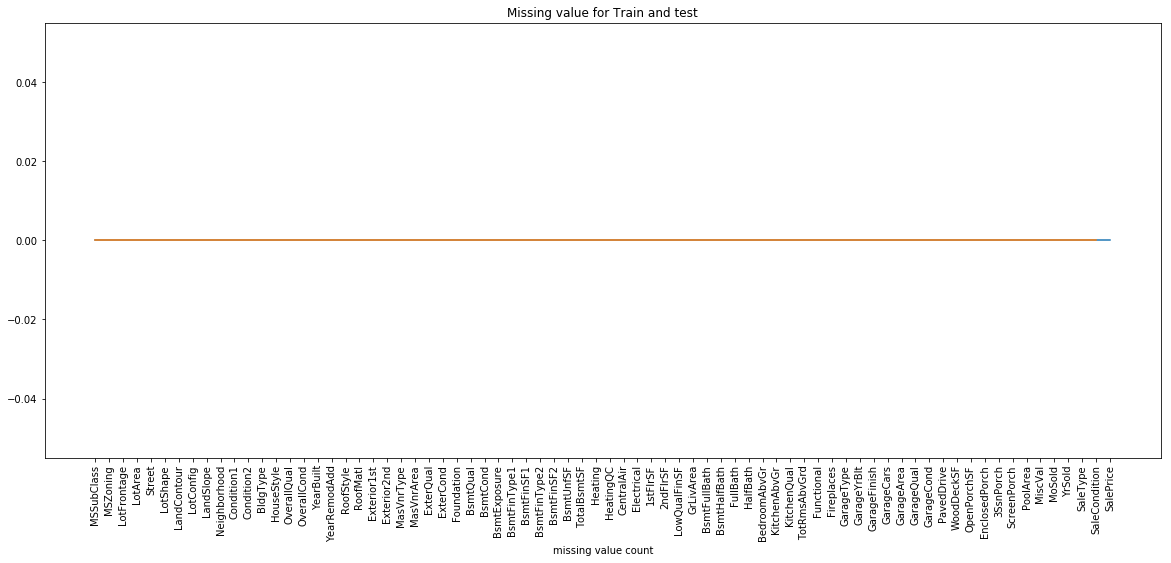

In [24]:
# Visualizing missing value
Train_house_price.isnull().sum().plot(figsize = (20,8))
Test_house_price.isnull().sum().plot(figsize = (20,8))
plt.title("Missing value for Train and test")
plt.xlabel("missing value count")
plt.xticks(np.arange(len(Train_house_price.columns)),Train_house_price.columns, rotation = "vertical");

### All the missing values have been filled, now we will further move to check the outliers in the dataset. 

In [25]:
# Checking the distrbution of the numerical cols.

Numerical_col = Train_house_price.loc[:,["MSSubClass","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea",
                "GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold",
                "SalePrice"]]


Numerical_col_test = Test_house_price.loc[:,["MSSubClass","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea",
                "GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold"]]

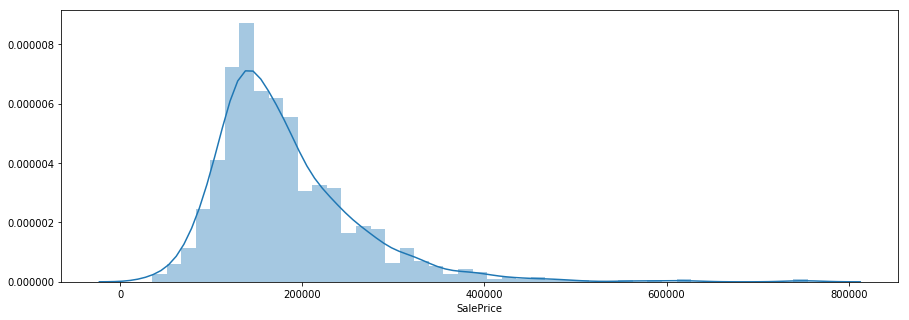

In [26]:
# Checking target col distribution
plt.figure(figsize=(15,5))
sns.distplot(Train_house_price["SalePrice"]);

Target column in right skewed<br>
Most of the sales price are below 400000

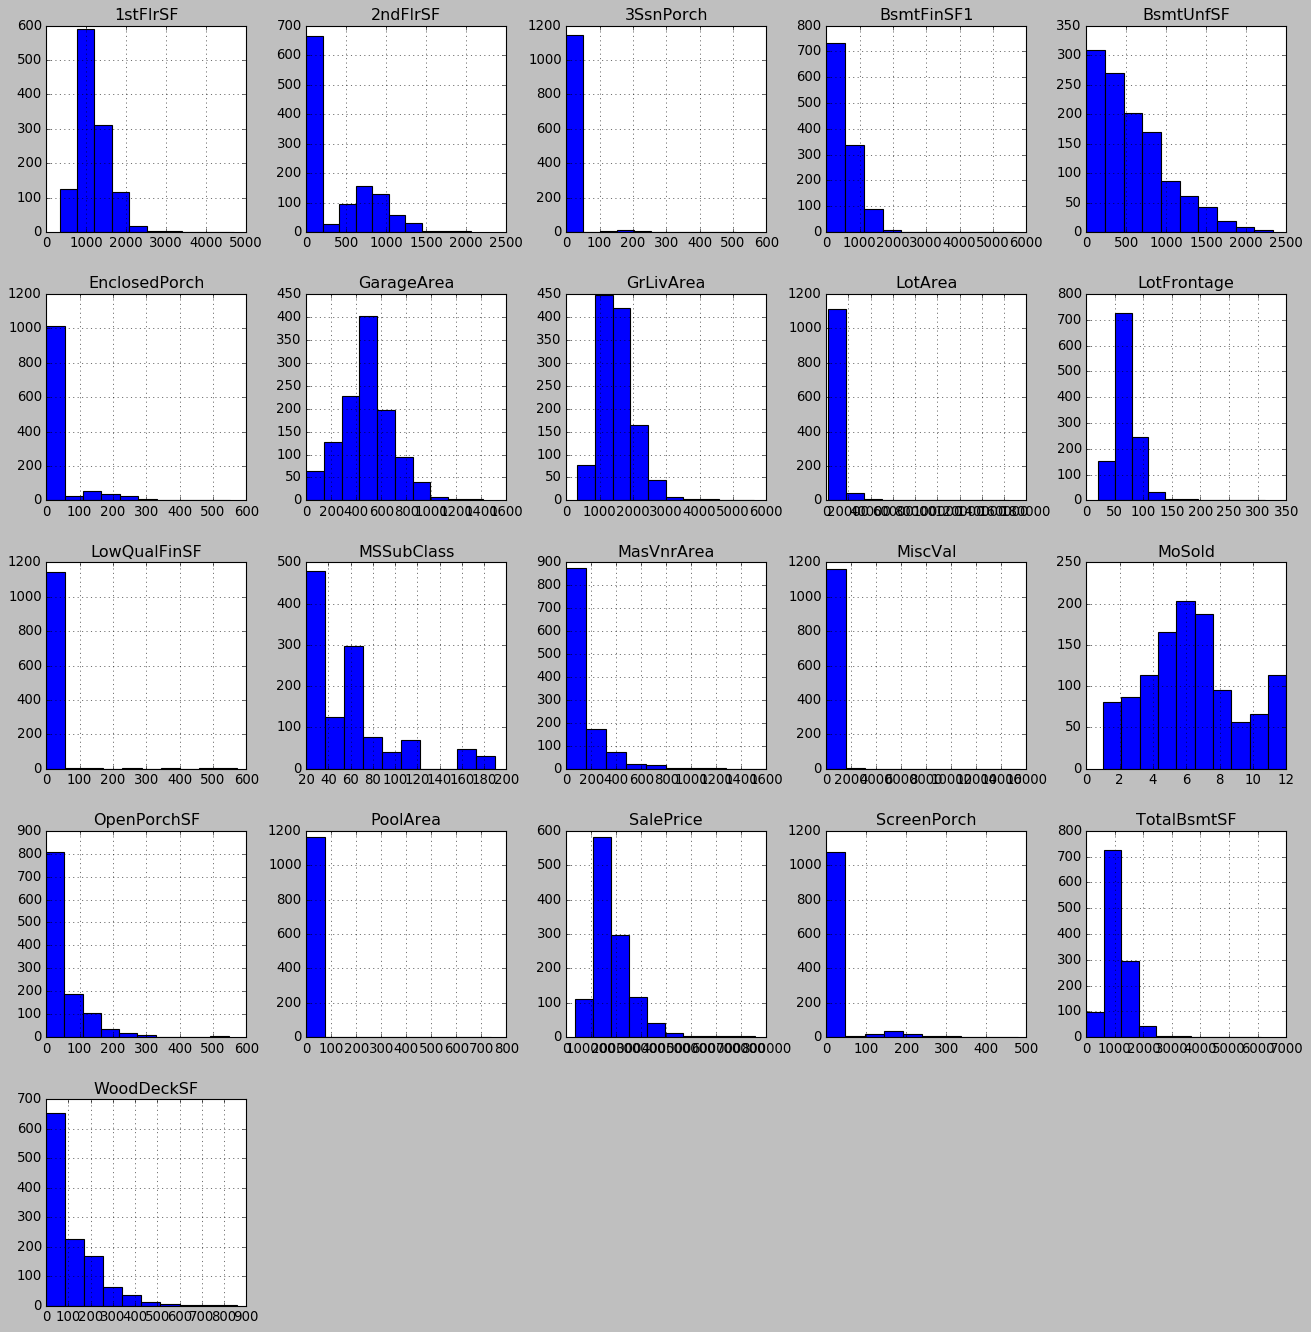

In [27]:
# checking the distribution of the features on training data
plt.style.use("classic")
Numerical_col.hist( figsize=(20,20));   

we have Garagearea col which looks like normal distributed and rest are all skewed, let check the outlier data

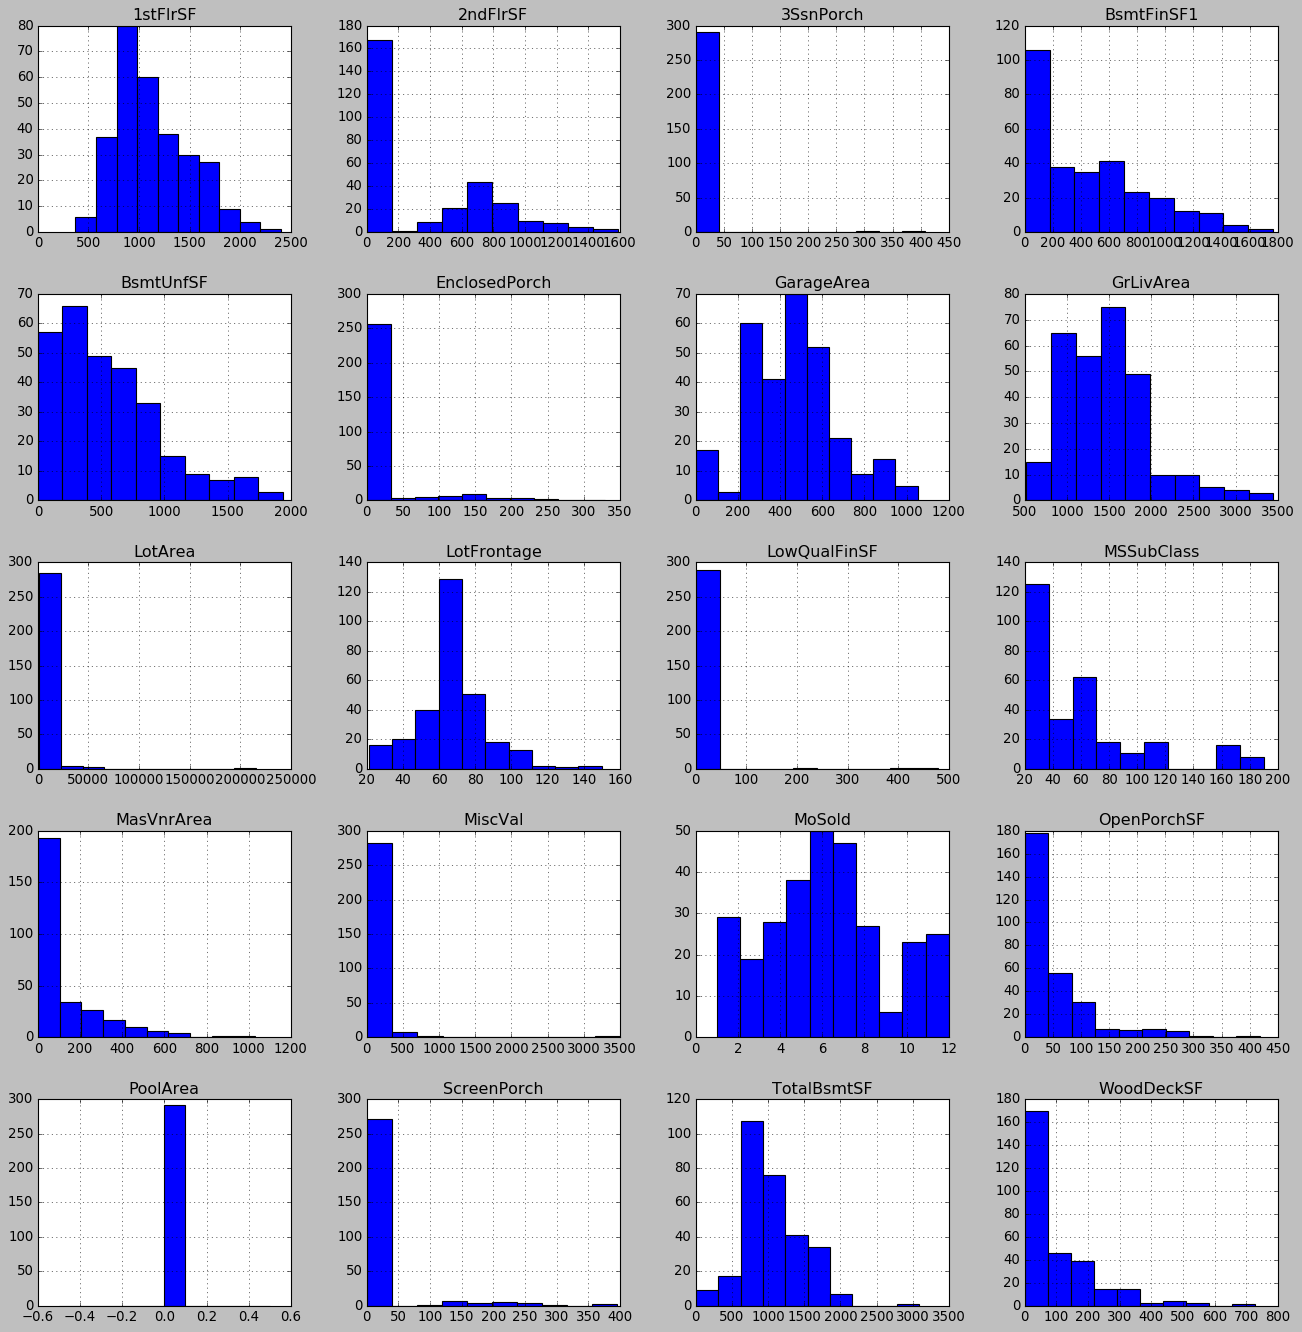

In [28]:
# Checking the dutribution on test data
plt.style.use("classic")
Numerical_col_test.hist( figsize=(20,20));   

All are skewed columns in test data

In [29]:
# creTED METHOD TO DRAW BOXPLOT 
def outlier_detection(data,variable):
    plt.figure(figsize=(8,4))
    sns.boxplot(data[variable])

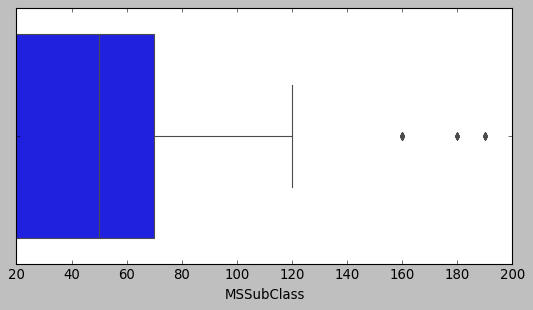

In [30]:
outlier_detection(Train_house_price,"MSSubClass")

i see very less outliers and it is ok to have them in the data 

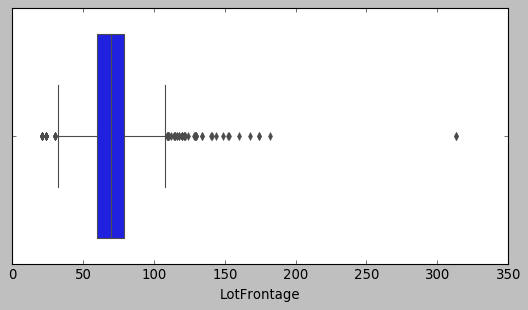

In [31]:
outlier_detection(Train_house_price,"LotFrontage")

We will treat outlier from this columns

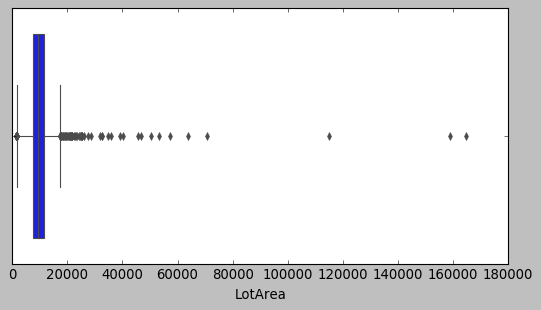

In [32]:
outlier_detection(Train_house_price,"LotArea")

This also need correction

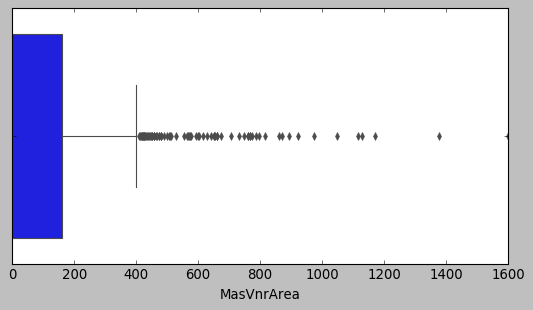

In [33]:
outlier_detection(Train_house_price,"MasVnrArea")

Need outier correction

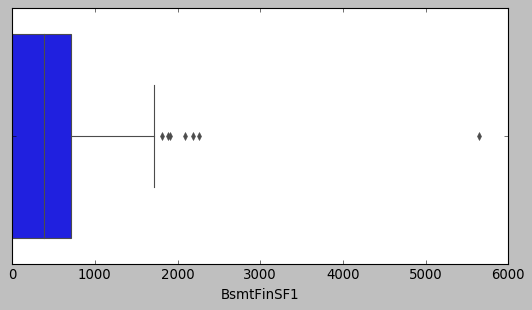

In [34]:
outlier_detection(Train_house_price,"BsmtFinSF1")

This col is good to go

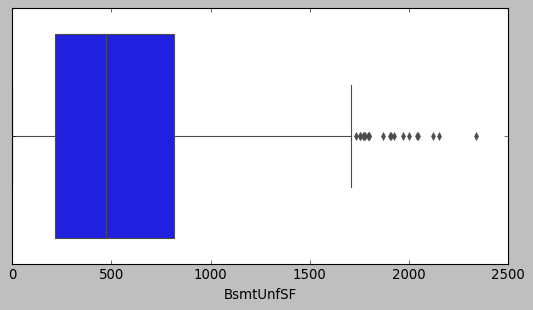

In [35]:
outlier_detection(Train_house_price,"BsmtUnfSF")

this is also good to go, we see value to close to upper whisker

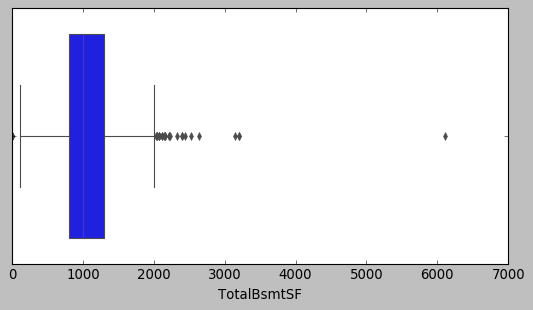

In [36]:
outlier_detection(Train_house_price,"TotalBsmtSF")

this is also ok

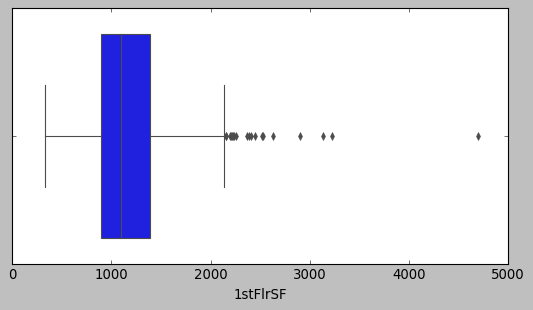

In [37]:
outlier_detection(Train_house_price,"1stFlrSF")

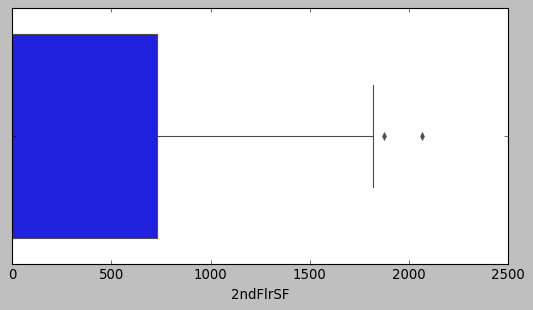

In [38]:
outlier_detection(Train_house_price,"2ndFlrSF")

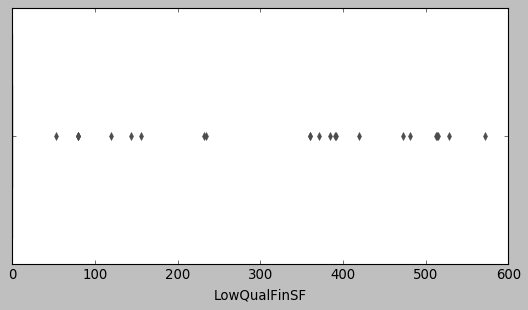

In [39]:
outlier_detection(Train_house_price,"LowQualFinSF")

98% values are zeros, since it is related to place and it may contribute the target variable

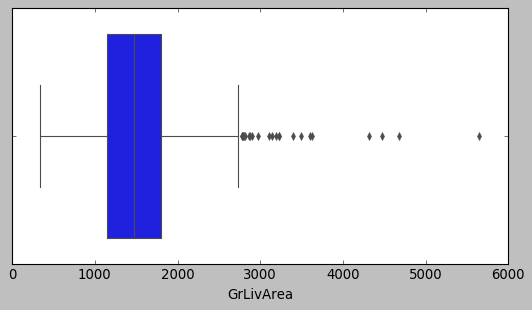

In [40]:
outlier_detection(Train_house_price,"GrLivArea")

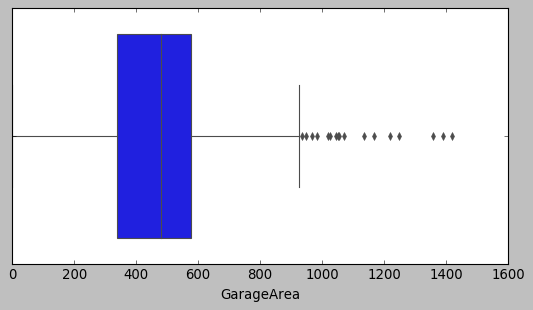

In [41]:
outlier_detection(Train_house_price,"GarageArea")

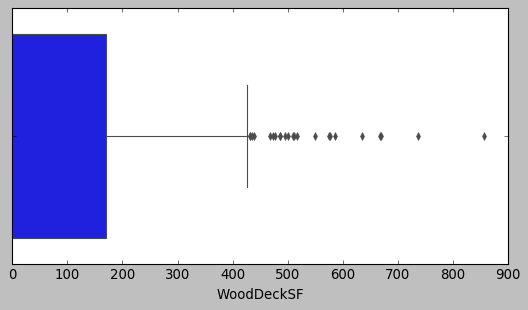

In [42]:
outlier_detection(Train_house_price,"WoodDeckSF")

## Observations
i have seen couple of columns outlier status and i have found that a few of these columns have extreme values but those are very close of upper whisker. a few of the cols have more extreme values but looking at the nature of those cols it is possible to have them in the data because area is very important field in this data.Now we are moving further for some feature engineering

## Feature Engineering

In [43]:
# we have some year columns, i will convert them into years
# changing training set  
Train_house_price["YearBuilt"] = 2020 - Train_house_price["YearBuilt"]
Train_house_price["YearRemodAdd"] = 2020 - Train_house_price["YearRemodAdd"]
Train_house_price["GarageYrBlt"] = 2020 - Train_house_price["GarageYrBlt"]
Train_house_price["YrSold"] = 2020 - Train_house_price["YrSold"]

# Changing the test set
Test_house_price["YearBuilt"] = 2020 - Test_house_price["YearBuilt"]
Test_house_price["YearRemodAdd"] = 2020 - Test_house_price["YearRemodAdd"]
Test_house_price["GarageYrBlt"] = 2020 - Test_house_price["GarageYrBlt"]
Test_house_price["YrSold"] = 2020 - Test_house_price["YrSold"]

we have completed the features engineering task 

## Label Encoding

In [44]:
# we have several categoical variable, lets convert them and encode them, we will use cat.codes codes to convert them

# updated the seprated object col lit
train_cat_var = Train_house_price.select_dtypes(include = "object")
test_cat_var = Test_house_price.select_dtypes(include = "object" )

train_cat_var.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
# before applying encoding , i want to keep data as it is for EDA thus creating copy of the data
EDA_purpose = Train_house_price.copy()

In [47]:
# Method to convert cols to catrgorical type and their value to category 
def convert_to_category(data,cat_col):
    for cols in cat_col.columns:
        data[cols] =  data[cols].astype("category").cat.codes

In [48]:
# converting train & test data's object cols to category
convert_to_category(Train_house_price,train_cat_var)
convert_to_category(Test_house_price,test_cat_var)

In [49]:
Train_house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.000,4928,1,0,3,4,0,13,2,2,4,2,6,5,44,44,1,1,8,9,2,0.000,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,1,43.000,1,2,440,4,4,2,0,205,0,0,0,0,0,2,13,8,4,128000
1,20,3,95.000,15865,1,0,3,4,1,12,2,2,0,2,8,6,50,50,0,5,12,13,2,0.000,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,1,50.000,2,2,621,4,4,2,81,207,0,0,224,0,0,10,13,8,4,268000
2,60,3,92.000,9920,1,0,3,1,0,15,2,2,0,5,7,5,24,23,1,1,7,7,2,0.000,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,1,23.000,2,2,455,4,4,2,180,130,0,0,0,0,0,6,13,8,4,269790
3,20,3,105.000,11751,1,0,3,4,0,14,2,2,0,2,6,6,43,43,3,1,8,9,1,480.000,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,1,43.000,1,2,546,4,4,2,0,122,0,0,0,0,0,1,10,0,4,190000
4,20,3,70.000,16635,1,0,3,2,0,14,2,2,0,2,6,7,43,20,1,1,4,4,3,126.000,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,1,43.000,0,2,529,4,4,2,240,0,0,0,0,0,0,6,11,8,4,215000


# EDA

In [50]:
# we are calculating the property zone wise property areas and its price 
ms_zone_price = EDA_purpose.groupby("MSZoning")[["LotArea","SalePrice"]].median()
ms_zone_price

,LotArea,SalePrice
MSZoning,,
C (all),8712.000,81000.000
FV,7449.500,202925.000
RH,7468.000,136500.000
RL,10000.000,174000.000
RM,6120.000,124000.000


In [51]:
# calculating per square feet area's price 
ms_zone_price["SalePrice"]/ ms_zone_price["LotArea"]

MSZoning
C (all)    9.298
FV        27.240
RH        18.278
RL        17.400
RM        20.261
dtype: float64

Floating village residential category price is high as compared to other category, as per the definition,  is a special area where a retirement community was developed and have the highest median price. 31.73 square per feet <br>
people loves peace but it is not the case with everyone,some people love to live in low density areas and some love to live in high density area. high density area, i am assuming that everything which is necesarry for daily life is easily available as compared to low density area and prices are also define accordinlgy, by nature if everything is acceaable easily prices will be high for that place. 
we can see the same affect here in data as well. **Average RH price per square feet is 18.27 and for RL is 17.40 per square feet**. 
we see that RM price is high as compared to RH considering several factor like easy access to things, low noice population, low air population, less crowd etc. 

In [52]:
# what type of road homes have and how price affect that 
EDA_purpose.groupby("Street")["SalePrice"].mean()

Street
Grvl   121110.750
Pave   181684.450
Name: SalePrice, dtype: float64

Sicne paved road looks more durabale as compared to gravel road and if properly is on side of that road and any society has access to it, prices would definately going to be high and we can see the same here as well in the data 

In [53]:
# Checking the shape of the property because that also affect the price, let see how does it really affact.

Lot_shape = EDA_purpose.groupby(["LotShape","LandContour"])["LotArea","SalePrice"].median()
Lot_shape

LotArea  SalePrice
LotShape LandContour                     
IR1      Bnk         10120.000 159500.000
         HLS         11207.000 228950.000
         Low         14364.000 224000.000
         Lvl         10603.000 188000.000
IR2      Bnk         25050.000 199717.000
         HLS         24761.000 208500.000
         Low         71923.500 231000.000
         Lvl         12999.500 204000.000
IR3      Bnk         63887.000 160000.000
         HLS         23257.000 274725.000
         Low         16196.000 215000.000
         Lvl         16226.000 259000.000
Reg      Bnk          8331.500 132000.000
         HLS          7658.000 133625.000
         Low         11070.000 131000.000
         Lvl          8952.000 148250.000

In [54]:
Lot_shape["SalePrice"]/Lot_shape["LotArea"] 

LotShape  LandContour
IR1       Bnk           15.761
          HLS           20.429
          Low           15.595
          Lvl           17.731
IR2       Bnk            7.973
          HLS            8.420
          Low            3.212
          Lvl           15.693
IR3       Bnk            2.504
          HLS           11.813
          Low           13.275
          Lvl           15.962
Reg       Bnk           15.843
          HLS           17.449
          Low           11.834
          Lvl           16.561
dtype: float64

i tried comparing  land shape and their level of flatness and checking the price. i have found that regular share and slighly irregular shape are liked and thier prices are also high.


In [55]:
# Lets check the lot configuration wise price, it shows the confugration of the housees or property that how they are accessible from the road.
LotConfig_ = EDA_purpose.groupby("LotConfig")["LotArea","SalePrice"].median()
LotConfig_

,LotArea,SalePrice
LotConfig,,
Corner,10391,161000
CulDSac,12772,211000
FR2,10500,160000
FR3,11446,221500
Inside,9120,160000


In [56]:
# LotConfig wise per suqare feet price 
LotConfig_["SalePrice"]/LotConfig_["LotArea"] 

LotConfig
Corner    15.494
CulDSac   16.521
FR2       15.238
FR3       19.352
Inside    17.544
dtype: float64

one thing is very clear that if property has multiple access to the road/street, its value will be more as compared to other and we can see the same from the data as well FR3<br>
Inside lot is followed by FR3, i am assuming that it is more safe thus prices are higher<br>
property which has end at one side of the road those sort of property also affect the price

In [57]:
# We are going to check the property price are affecting by neighbors

Neighborhood= EDA_purpose.groupby("Neighborhood")["LotArea","SalePrice"].median()

# calculating the per square feet price 
Neighborhood["SalePrice"]/Neighborhood["LotArea"]

Neighborhood
Blmngtn   59.762
Blueste   84.615
BrDale    63.095
BrkSide   19.311
ClearCr   13.888
CollgCr   21.267
Crawfor   17.545
Edwards   13.740
Gilbert   17.685
IDOTRR    12.946
MeadowV   44.180
Mitchel   15.508
NAmes     14.660
NPkVill   45.623
NWAmes    17.071
NoRidge   24.748
NridgHt   26.921
OldTown   14.682
SWISU     16.607
Sawyer    14.127
SawyerW   19.309
Somerst   26.663
StoneBr   42.359
Timber    17.366
Veenker   21.822
dtype: float64

we can see that there a few neighborhood and price are high for their nearby areas. like Blmgtn,Blueste ,BrDale, MeadowV. which means neighborhood matters

In [58]:
# HouseStyle wise property price 
EDA_purpose.groupby("HouseStyle")["LotArea","SalePrice"].median()

,LotArea,SalePrice
HouseStyle,,
1.5Fin,8741.000,131000.000
1.5Unf,6803.500,115500.000
1Story,9457.000,155000.000
2.5Fin,10896.000,191000.000
2.5Unf,8850.000,131700.000
2Story,9900.000,194500.000
SFoyer,8119.000,136480.000
SLvl,10192.000,168500.000


ANalysis says that 2 story property price is higher than others followed by 2.5 fin property 

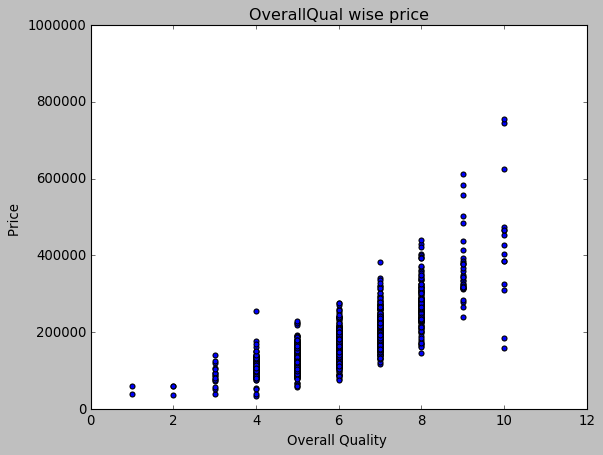

In [59]:
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.scatter(x = EDA_purpose["OverallQual"], y =EDA_purpose["SalePrice"])
plt.xlim(0,12,1)
plt.ylim(0,1000000)
plt.xlabel("Overall Quality ")
plt.ylabel("Price ")
plt.title("OverallQual wise price");

we can see that price are varing as per the overall quality of matiral used for building it. it depends on the lot also and we see that it has gone to $800000 . Same way we will check the overall condition of the house and relate with price

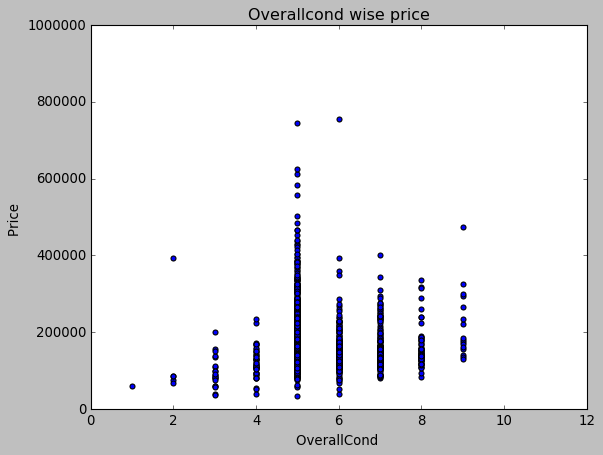

In [60]:
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.scatter(x = EDA_purpose["OverallCond"], y =EDA_purpose["SalePrice"])
plt.xlim(0,12)
plt.ylim(0,1000000)
plt.xlabel("OverallCond ")
plt.ylabel("Price ")
plt.title("Overallcond wise price");

basis of the overall condition rating and LotArea property price is going up and down. 

In [61]:
# Checking the property values in garage is attached of not
EDA_purpose.groupby("GarageType")["LotArea","SalePrice"].median()

,LotArea,SalePrice
GarageType,,
2Types,9600.000,150000.000
Attchd,9900.000,180000.000
Basment,9375.000,150500.000
BuiltIn,11131.500,236000.000
CarPort,10915.500,104900.000
Detchd,8287.500,129950.000


Builtin garage  add more value to the property followed by attached one. 

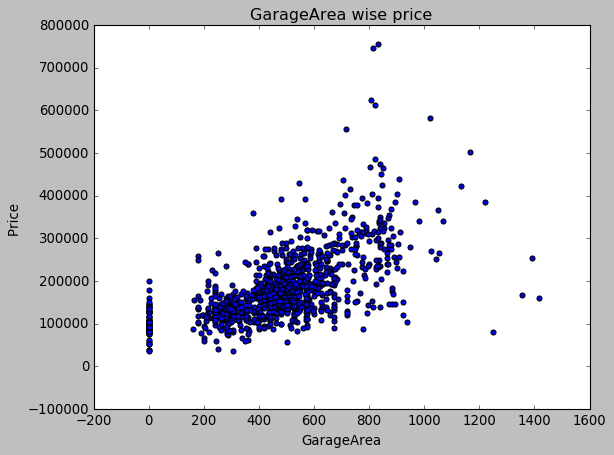

In [62]:
# let see how garageArea impact the saleprice
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.scatter(x = EDA_purpose["GarageArea"], y =EDA_purpose["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("Price ")
plt.title("GarageArea wise price");

we can see increaring trend in price by increasing the garage area, ofcourse lotArea matters a lot. Garage is also an important compotant people look for while purchasing home. 

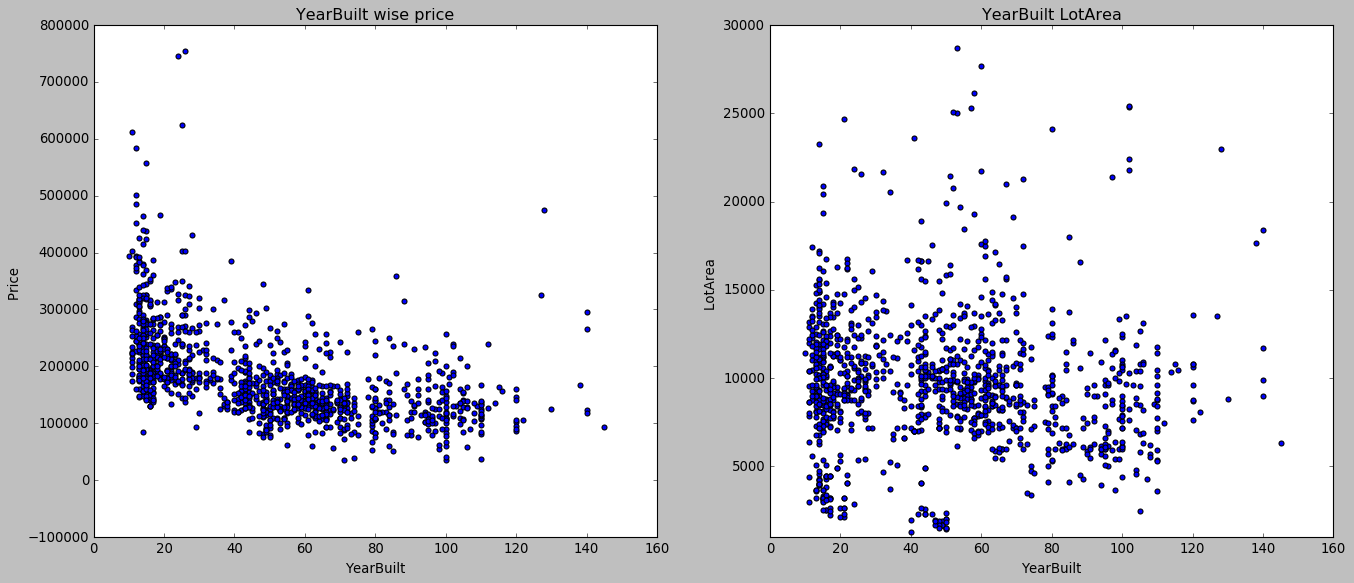

In [63]:
# we are going to see the what is the price of old and new property bases of lot area

# let see how garageArea impact the saleprice
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
plt.scatter(x = EDA_purpose["YearBuilt"], y =EDA_purpose["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("Price ")
plt.title("YearBuilt wise price")

plt.subplot(1,2,2)
plt.scatter(x = EDA_purpose["YearBuilt"], y =EDA_purpose["LotArea"])
plt.xlabel("YearBuilt")
plt.ylabel("LotArea ")
plt.title("YearBuilt LotArea");
plt.ylim(1000,30000); # setting the axis 

majority of the house are 70 years old and their price fall under $400000, we can count that only 6 house and those are below 20 years and their price is between 6.5 to 8 LAKH<br>
majority of the property lot is below or equal to 15000 square feet.

In [64]:
# check the the foundation of the home and some releted component to check the price of the home

EDA_purpose.groupby("Foundation")[["LotArea","YearBuilt","TotalBsmtSF","GarageArea","SalePrice"]].median()

,LotArea,YearBuilt,TotalBsmtSF,GarageArea,SalePrice
Foundation,,,,,
BrkTil,8665.500,98.000,796.000,340.000,128000.000
CBlock,9600.000,57.000,964.000,440.000,141000.000
PConc,9588.000,18.000,1145.000,541.000,206300.000
Slab,8339.000,65.000,0.000,400.000,106500.000
Stone,9042.000,110.000,1020.000,414.000,137000.000
Wood,12134.000,32.000,559.000,492.000,164000.000


LotArea is the total area in which a house is built and TotalBsmtSF and GarageArea are part of the total area. i am checking that wheather foundation plays important role in the pricing or not.
poured Concrete is considered one of the best and strong building block for any constrution and we have seen the same from the data also. price are higher for these kind of building foundation.
it is also seen that this trend has started recently the average years of this trend is 18 years.


In [65]:
# let check out the sale of the house based on sales condition and lot area

EDA_purpose.groupby("SaleCondition")[["LotArea","SalePrice"]].median()

,LotArea,SalePrice
SaleCondition,,
Abnorml,9000.000,135000.000
AdjLand,8285.000,104000.000
Alloca,7886.000,148145.000
Family,9601.500,140500.000
Normal,9500.000,160000.000
Partial,10399.500,239399.500


Partial category which belongs to new home has highest rate as other sales conditions. 

### EDA conclusion 

we have seen sale price by relating different component and these conponent impact prices of the property.
lotarea is very important parameter in prediction. property with multiple accesses to the road is also impact the price.
Foundation of the buildung is also matters in prediction.it has also proved that neighborhood of the property plays important role in the price
houses which are built recently and used concrete for builing them, those looks strong and price is also high for those set of homes. 


## So we have our training and test data ready after encoding. i am not going to check variance  and correaltion among the data set.

In [66]:
# checking variance of numerical values
Numrical_col = Train_house_price[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch',  'MiscVal', 'MoSold',
       'SalePrice']]

Numrical_col_test = Test_house_price[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold']]

In [67]:
Numrical_col.var()

LotFrontage            503.568
LotArea           80235772.750
MasVnrArea           33203.576
BsmtFinSF1          214058.703
BsmtUnfSF           201938.362
TotalBsmtSF         195604.742
1stFlrSF            153007.697
2ndFlrSF            193332.898
LowQualFinSF          2590.082
GrLivArea           278829.365
GarageArea           45995.995
WoodDeckSF           15916.090
OpenPorchSF           4406.440
EnclosedPorch         3993.114
3SsnPorch              846.162
ScreenPorch           3033.896
MiscVal             295136.243
MoSold                   7.216
SalePrice       6257693873.014
dtype: float64

In [68]:
Numrical_col_test.var()

LotFrontage           399.305
LotArea         177706757.182
MasVnrArea          30571.048
BsmtFinSF1         184521.514
BsmtUnfSF          168956.979
TotalBsmtSF        180252.172
1stFlrSF           134646.372
2ndFlrSF           180012.521
LowQualFinSF         1460.732
GrLivArea          264401.052
GarageArea          44430.565
WoodDeckSF          14859.326
OpenPorchSF          4338.257
EnclosedPorch        2692.874
3SsnPorch             914.911
ScreenPorch          3420.317
MiscVal             50192.227
MoSold                  7.698
dtype: float64

In [69]:
Test_house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [70]:
"""Pool Area have 0 variance in test dataset, have checked the same in the training dataset as well and 
found we have maximum values are 0, it has only 6 other values"""

print("number of zero values in the series",Train_house_price["PoolArea"][Train_house_price["PoolArea"]==0].count())

# # we have seen that we have 1161 zero values out 1169, we are dropping it. from test and trainig data.
Train_house_price.drop("PoolArea",axis = 1, inplace = True)
Test_house_price.drop("PoolArea",axis = 1, inplace = True)

number of zero values in the series 1161


## Checking the correlation of the numerical data with heatmap

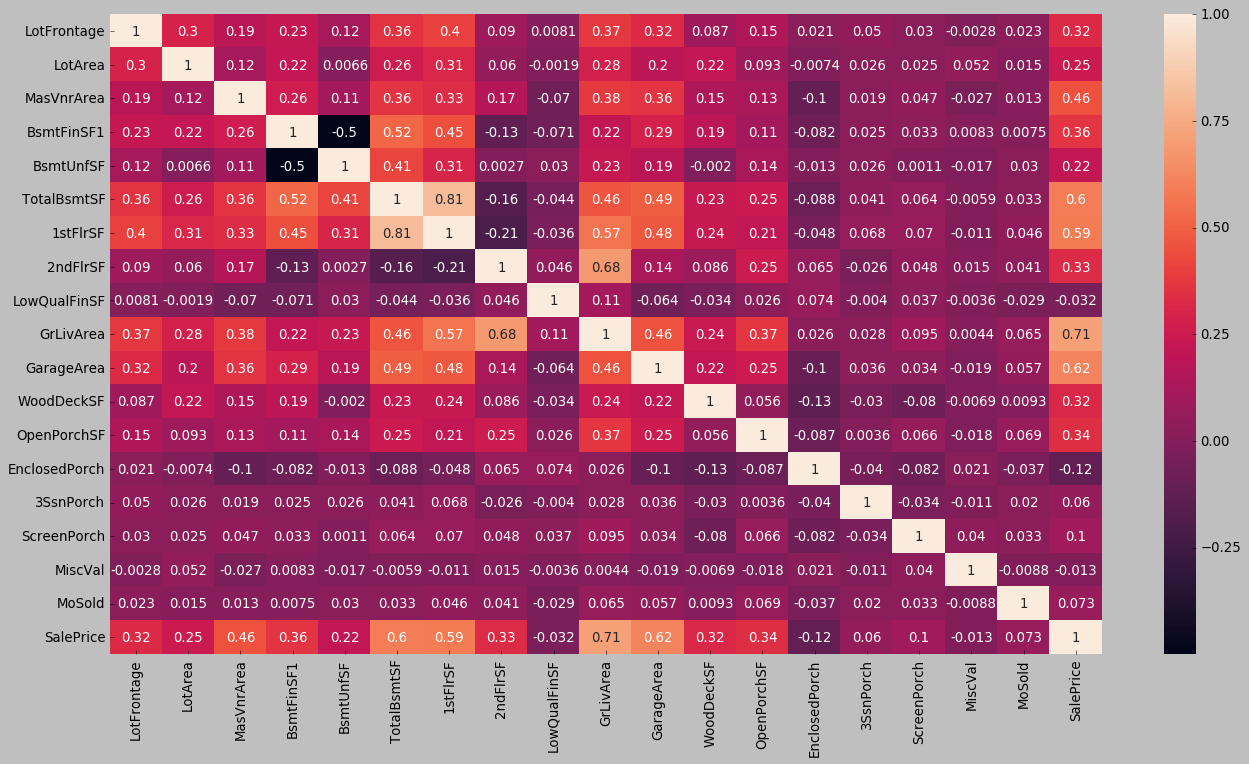

In [71]:
# Checking the correlation of the numerical data with heatmap
plt.figure(figsize=(20,10))
sns.heatmap(Numrical_col.corr(),annot = True)

We can see that a few columns are not contibuting to predict the sales values much, so we can remove them and those columns are Lowqualfinsf,enclosedporch, 3ssnporch, mosold, miscval, screenporch

In [72]:
# Removing cols after correlation check
Train_house_price.drop(columns = ["EnclosedPorch","LowQualFinSF","3SsnPorch","MoSold","MiscVal","ScreenPorch"],axis = 1, inplace = True)
Test_house_price.drop(columns = ["EnclosedPorch","LowQualFinSF","3SsnPorch","MoSold","MiscVal","ScreenPorch"],axis = 1, inplace = True)

In [73]:
# Checking the columns name 
Numrical_col.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

In [74]:
# updating the numerical_col variable for further checking the skewness
Numrical_col = Train_house_price[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

Numrical_col_test = Test_house_price[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

## Skewness correction

In [75]:
# created a copy for numerical data to check the skewness
Numrical_col_skew = Numrical_col.copy()
Numrical_col_test_skew = Numrical_col_test.copy()

In [76]:
Numrical_col_skew.skew()

LotFrontage    2.733
LotArea       10.659
MasVnrArea     2.836
BsmtFinSF1     1.872
BsmtUnfSF      0.909
TotalBsmtSF    1.745
1stFlrSF       1.514
2ndFlrSF       0.823
GrLivArea      1.450
GarageArea     0.190
WoodDeckSF     1.505
OpenPorchSF    2.411
dtype: float64

In [77]:
Numrical_col_test_skew.skew()

LotFrontage    0.499
LotArea       12.782
MasVnrArea     1.978
BsmtFinSF1     0.740
BsmtUnfSF      0.961
TotalBsmtSF    0.519
1stFlrSF       0.692
2ndFlrSF       0.766
GrLivArea      1.011
GarageArea     0.134
WoodDeckSF     1.708
OpenPorchSF    2.185
dtype: float64

we see that all the columns are skewed in training and test dataset.i am going to apply cuberoot, sqrt and box cox transformation to correct the skewness

In [78]:
# applying skewness method of training dataset 
for i in Numrical_col_skew.columns:
    Train_house_price[i] = np.cbrt(Train_house_price[i])
    
# Training data set 
Train_house_price["LotArea"] = boxcox(Train_house_price["LotArea"])[0]
Train_house_price["MasVnrArea"] = np.sqrt(Train_house_price["MasVnrArea"]) 

In [79]:
# applying skewness method of test dataset 
for i in Numrical_col_test_skew.columns:
    Test_house_price[i] = np.cbrt(Test_house_price[i])
    
# Training data set 
Test_house_price["LotArea"] = boxcox(Test_house_price["LotArea"])[0]
Test_house_price["MasVnrArea"] = np.sqrt(Test_house_price["MasVnrArea"]) 

i have applied cube root on entire data numeric data and found that except lotarea and  MasVnrArea skewness got corrected. have applied boxcox and sqrt on these two col respectively for correct the skewness. now we have data set with removed skewness

## Data is ready for modeling, seprating traning data into X and Y

In [80]:
X = Train_house_price.iloc[:,:-1] # seprating x and removing target feature from the X 
y = Train_house_price["SalePrice"] # saving target vriable into y

# transforming the data for scaling purpose 
RB = RobustScaler()
X_RB =  RB.fit_transform(X)

# scallling the test data
X_test_RB = RB.fit_transform(Test_house_price)


# spliting into training and test for model training
X_train,X_test,y_train,y_test = train_test_split(X_RB,y, test_size =0.2, random_state =60)

In [81]:
#checking the shape of the training and test dataset
print("training data X ",X_train.shape)
print("training data Y",y_train.shape)
print("training_test data X",X_test.shape)
print("training_test data Y",y_test.shape)

training data X  (934, 66)
training data Y (934,)
training_test data X (234, 66)
training_test data Y (234,)


In [82]:
# saving for all the models in a list so that for loop can be applied 
Models = [RandomForestRegressor(),GradientBoostingRegressor(),SVR(),DecisionTreeRegressor(),AdaBoostRegressor(), LinearRegression()]
for model in Models: # running loop for getting result from multiple model and then we will compare all the model
    print(model,"\n")
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print("Mean_squared_error",mean_squared_error(y_test,prediction))
    print("R2_score",r2_score(y_test,prediction))
    print("\n")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Mean_squared_error 750882485.75
R2_score 0.866118837986


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False) 

Mean_squared_error 606715711.063
R2_score 0.891823546359


SVR(C=1.0, cache_size=200, coef0=0.0, deg

i have applied 6 ML models to check which one is working good. out of all the the ML models, GradientBoostingRegressor is working very well on this dataset. its r2_score is and Mean_error are good as compared to other models.further, i am going to use GradientBoostingRegressor model for hyperparameter tuning using gridsearch CV and then we will for for cross validation. once it is done will test out actual test data. 

## GridSearch CV

In [83]:
Parameter = {"loss":["ls", "lad"], "learning_rate" :[0.1,0.2,0.4,0.5,0.7],"n_estimators" :[100,200,300,500],"max_depth":[3,5,7,9],
             "max_features":["auto", "sqrt", "log2"]}


grid_search = GridSearchCV(GradientBoostingRegressor(),param_grid =Parameter , scoring ="r2", n_jobs =-1, cv = 10)

grid_search.fit(X_RB,y)
print("average r2 score",grid_search.best_score_) # this is the average score  of 10 CV.
print("best parameter",grid_search.best_params_) # these are the best parameters

average r2 score 0.87703583048
best parameter {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


So we have got best parameter as average r2 score is 88.42, now with that parameters , we will train our model and check the test data 

## Cross_val_score

In [114]:
cross_GBR = GradientBoostingRegressor(max_depth =5,n_estimators=300,loss="ls",max_features ="log2",learning_rate = 0.1)

for i in range(2,11):
    CVS = cross_val_score(cross_GBR,X_RB,y,scoring ="r2", cv = i, n_jobs = -1)
    print("At iteration of ",i,"the average score in",CVS.mean(), "and the SD is ", CVS.std())

At iteration of  2 the average score in 0.864285257827 and the SD is  0.000607287720158
At iteration of  3 the average score in 0.87597673652 and the SD is  0.00257450348086
At iteration of  4 the average score in 0.857803457782 and the SD is  0.0401650557153
At iteration of  5 the average score in 0.871665970974 and the SD is  0.0427542960342
At iteration of  6 the average score in 0.881218672375 and the SD is  0.0281025953557
At iteration of  7 the average score in 0.868480415872 and the SD is  0.0425448753808
At iteration of  8 the average score in 0.870981781142 and the SD is  0.0525064972424
At iteration of  9 the average score in 0.867955287838 and the SD is  0.05476636005
At iteration of  10 the average score in 0.877392620419 and the SD is  0.0712787308966


on an average, we have found 87+ accuracy on the model. we can see it thorugh above iterations 

In [85]:
# training the data and passing best parameter to the model 
GBR = GradientBoostingRegressor(max_depth =5,n_estimators=300,loss="ls",max_features ="log2",learning_rate = 0.1)
GBR.fit(X_RB,y)

# Predicting the test data and saving it prediction in the prediction column in test data itself.
Test_house_price["Prediction"] = GBR.predict(X_test_RB) 

In [90]:
#Extracting the feature importance
Features_importance = GBR.feature_importances_  

# Saving the same into pandas series 
Features_importance["value"] = pd.Series(Features_importance, index = X.columns,)

# Assigning a name to feature.
Features_importance = Features_importance.rename("Value")

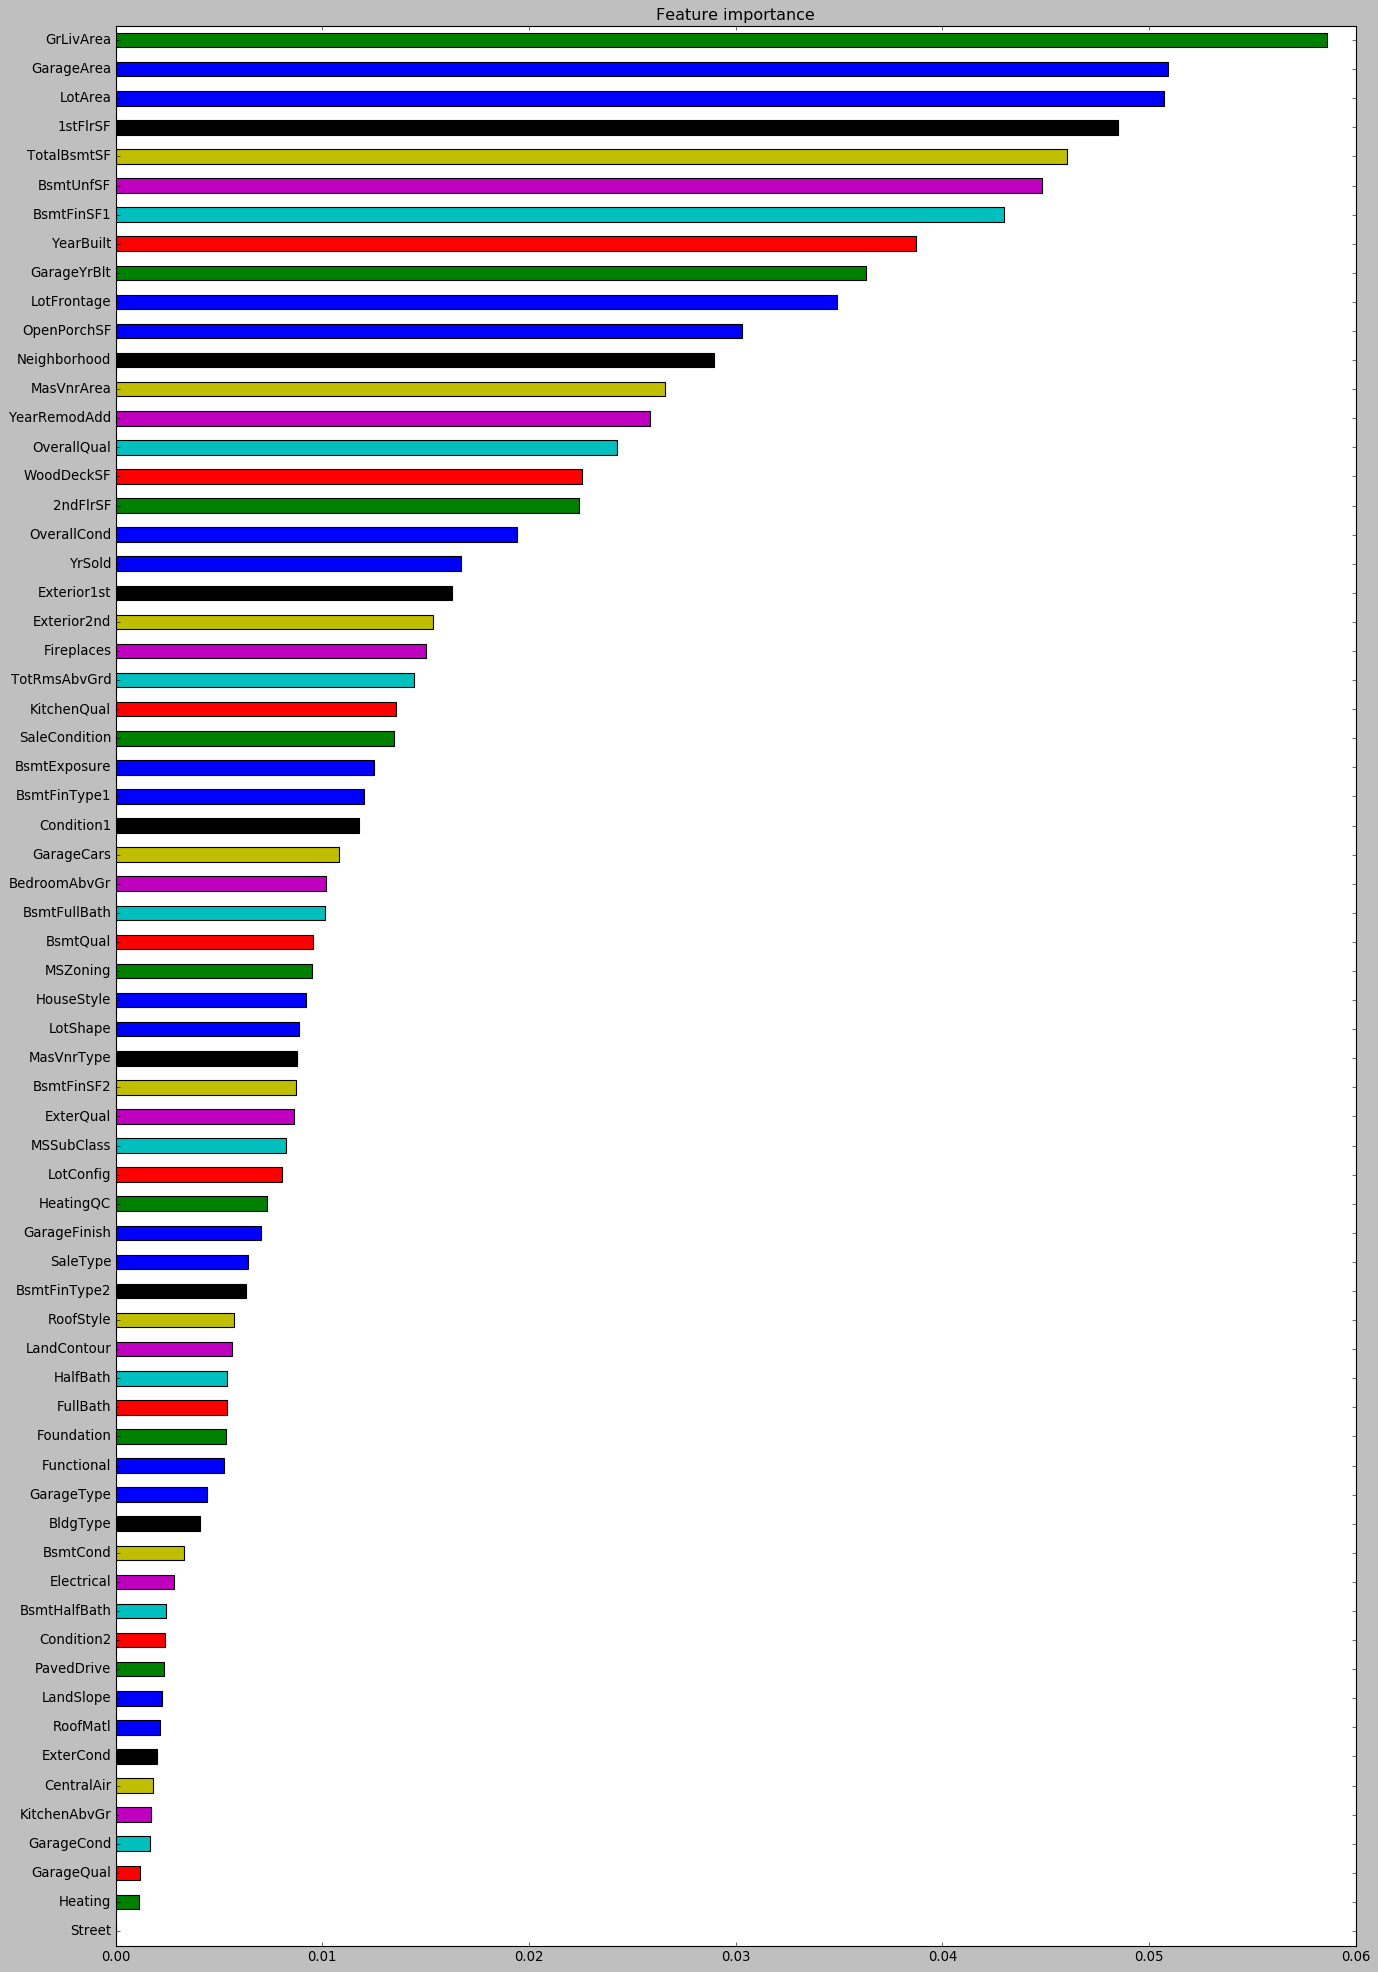

In [107]:
# extracting the features importance
plt.figure(figsize =(20,30))
Features_importance.nlargest(70).sort_values(ascending = True).plot(kind = "barh")
plt.title("Feature importance");

Top 25 features are most important to predict the sales price

In [86]:
Test_house_price.head() # checking a few observation of prediction

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition,Prediction
0,20,2,4.414,3.239,1,0,1,0,0,21,2,0,0,2,9,5,15,14,3,0,9,11,3,2.418,2,3,2,0,2,1,2,10.769,5,0,8.763,12.433,0,0,1,3,12.433,0.000,12.433,1,0,2,0,3,1,2,8,5,1,1,15.000,0,3,8.776,4,4,2,5.625,3.708,13,5,2,341632.719
1,120,2,4.021,2.933,1,0,3,1,0,21,2,0,4,2,8,5,36,36,1,0,5,5,2,0.000,2,3,1,2,2,0,2,10.119,5,0,5.688,10.685,0,2,1,3,11.079,0.000,11.079,1,0,1,0,1,1,2,4,5,1,1,36.000,1,2,8.267,4,4,2,3.979,0.000,11,0,0,217256.824
2,20,2,4.021,3.178,1,3,3,4,0,4,2,0,0,2,8,5,19,19,3,0,9,11,2,0.000,2,3,2,2,2,0,5,0.000,5,0,12.058,12.058,0,0,1,3,12.137,0.000,12.137,0,0,2,0,3,1,0,7,5,1,1,19.000,1,2,8.052,4,4,2,5.867,5.325,11,5,2,235412.611
3,70,2,4.217,3.182,1,3,0,4,0,5,2,0,0,5,7,7,79,70,1,0,6,7,2,0.000,3,3,1,3,2,3,4,6.503,5,0,7.542,8.896,0,0,1,3,9.510,8.896,11.608,0,0,1,1,3,1,1,7,5,1,1,79.000,2,1,6.162,4,4,2,0.000,0.000,11,5,2,180814.094
4,60,2,4.414,3.250,1,0,3,1,0,20,1,0,0,5,6,5,13,13,1,0,9,11,3,2.049,2,3,2,2,2,2,5,0.000,5,0,9.633,9.633,0,0,1,3,9.633,10.128,12.457,0,0,2,1,4,1,2,9,5,1,3,13.000,0,3,8.742,4,4,2,4.642,2.621,12,5,2,224920.193


## Conclusion

we were given training and test csv file separately, training set has 1168 observation with 81 columns including target one. Test file has 80 columns as it doesn't have Target column. I found missing values in couple of columns, some columns missing value percentage was quite high. i took 20% threshold, columns which had 20% or above that missing value those were dropped and less than 20% missing value imputed with mode, median and respective col's value. i have checked categorical columns and found that one column had only one single value in it, have deleted them. have checked outlier as well, in maximum columns majority of values are near to the upper whisker and a few values were far. i have not removed them consider that the nature of property. some lot sizes are small and some are large thus i didn't remove them.all categorical columns are encoded by using cat.codes function. Skewness also get removed from the columns. Features which had high correlated were got deleted. features which were not adding values to the predicting sales were also removed from the data. While modeling the , dataset were scaled and then given to model.GradientBoostingRegressor is working well on the dataset and provide good r2 score and low MSE. i have selected this as final one and did hyper parameter tuning. average r2 score after Gridsearch CV is 88.44. at the last ML algorithm is trained on best parameter and tested on test data.